# Γενικά

* Εδώ υπάρχει μία λίστα με 10 projects για το μάθημα.
* Όλοι οι φοιτητές θα πρέπει να υλοποιήσουν και τα 10 projects
* Τα projects είναι ατομικά 
* Παρόλο το όνομά τους (projects) είναι στην ουσία μικρές ασκήσεις. Κάθε project θέλει το πολύ ~20 γραμμές για να υλοποιηθεί. 
* Κάθε project απαίτεί το πολύ 5 λεπτά υπολογιστικό χρόνο και ελάχιστη μνήμη. Αν η υλοποίησή σας έχει πρόβλημα με χρόνο / μνήμη, τότε έχετε κάνει κάποιο πολύ βασικό λάθος!
* Όλα τα projects είναι βαθμολογικά ισοδύναμα αλλά δεν είναι το ίδιο δύσκολα. Ξεκινήστε από αυτά που σας φαίνονται πιο εύκολα. Ίσως τα πιο δυσκολούτσικα είναι το 7 και το 10. 
* Όπως πάντα στείλτε στο slack απορίες.

### Χρήσιμες συναρτήσεις:

In [1]:
import urllib3

def download(url, filename):
    '''
    Downloads the file that is located in "url" and saves it in "filename"
    Adapted from: https://stackoverflow.com/a/17285906/5626738 
    '''

    chunk_size = 1024 * 1024 # 1MB chunk size
    http = urllib3.PoolManager()
    r = http.request('GET', url, preload_content=False)

    with open(filename, 'wb') as out, http.request('GET', url, preload_content=False) as r:
        while True:
            data = r.read(chunk_size)
            if not data:
                break
            out.write(data)
    

    

# Project 1


Το [TCGA](https://en.wikipedia.org/wiki/The_Cancer_Genome_Atlas), η "The Canger Genome Atlas" είναι ένα από τα μεγαλύτερα project στη περιοχή της έρευνας πάνω σε γενετικές μεταλλάξεις που σχετίζονται με τον καρκίνο. Το TCGA είναι στην ουσία μία συλλογή από projects, όπου το κάθε ένα εστιάζει και σε διαφορετικό είδος καρκίνου. Μπορείτε να επιλέξετε τον σύνδεσμο "[projects](https://portal.gdc.cancer.gov/projects)" και να δείτε ποια είναι αυτά. Ένα από τα πιο σημαντικά projects είναι το [TCGA-BRCA](https://portal.gdc.cancer.gov/projects/TCGA-BRCA) το οποίο περιέχει δεδομένα για τον καρκίνο του μαστού. 

Ένα από τα μεγαλύτερα προτερήματα του TCGA είναι ότι εκτώς από γενετικά δεδομένα, περιέχει και (ανώνυμα φυσικά!) κλινικά δεδομένα σχετικά με τους ασθενείς. Για παράδειγμα μπορείτε να πάτε στο [TCGA-BRCA](https://portal.gdc.cancer.gov/projects/TCGA-BRCA) project και να επιλέξετε Clinical --> JSON. Αφού το κάνετε αυτό θα κατέβει στον υπολογιστή σας ένα αρχείο σε json φορμάτ το οποίο περιέχει βασικές κλινικές πληροφορίες για 1098 ασθενείς. 

Ας φορτώσουμε αυτο αρχείο:

In [5]:
fn= '/Users/admin/Downloads/clinical.project-TCGA-BRCA.2022-04-06.json'

In [8]:
import json
with open(fn) as f:
    d = json.load(f)
    
print (len(d))

1098


Ας τυπώσουμε τα δεδομένα για τον 101ο ασθενη:

In [9]:
print (json.dumps(d[100], indent=4))

{
    "exposures": [
        {
            "cigarettes_per_day": null,
            "alcohol_history": "Not Reported",
            "updated_datetime": "2019-07-31T21:59:55.509602-05:00",
            "exposure_id": "69fd9327-1f90-584f-ac01-7ec3935fc5a8",
            "submitter_id": "TCGA-E9-A1RI_exposure",
            "years_smoked": null,
            "state": "released",
            "created_datetime": null,
            "alcohol_intensity": null
        }
    ],
    "case_id": "dd3bfb26-b534-4917-9c4d-9fe7b6477762",
    "diagnoses": [
        {
            "synchronous_malignancy": "No",
            "ajcc_pathologic_stage": "Stage IIIA",
            "days_to_diagnosis": 0,
            "created_datetime": null,
            "treatments": [
                {
                    "treatment_intent_type": null,
                    "updated_datetime": "2019-07-31T21:59:55.509602-05:00",
                    "treatment_id": "d814372f-6ce4-59d2-b8eb-b8f80f356197",
                    "submitter_i

Εδώ βλέπουμε ότι ο συγκεκριμένος ασθενής διαγνώσθηκε με: `Infiltrating duct and lobular carcinoma`. Επίσης παρατηρούμε ότι ο ασθενής όταν διαγνώσθηκε ήταν 15942 ημερών (`age_at_diagnosis`) ή αλλιώς 43.68 χρονών. Σε αυτή την άσκηση θα πρέπει να φτιάξετε ένα pandas dataframe το οποίο να περιέχει τις εξής στήλες:
* `diagnosis` : Όλα τα διαφορετικά `primary_diagnosis`.
* `Average age at diagnosis`: Ο μέσος όρος διάγνωσης για όλους τους ασθενείς που έχουν αυτή τη διάγνωση. 

* Το dataframe θα περιέχει μόνο τις διαγνώσεις για τις οποίες υπάρχουν παραπάνω από 10 ασθενείς. 
* To dataframe θα πρέπει να είναι ταξινομημένο με βάση τη στήλη `Average age at diagnosis` από τη μικρότερο στη μεγαλύτερη. 

Δίνεται το αποτέλεσμα:

,diagnosis,Average age at diagnosis
0,"Infiltrating duct carcinoma, NOS",58.094956
1,Infiltrating duct and lobular carcinoma,58.718591
2,Infiltrating duct mixed with other types of ca...,60.096467
3,"Metaplastic carcinoma, NOS",61.044814
4,"Lobular carcinoma, NOS",62.125805
5,Mucinous adenocarcinoma,69.125662


# Project 2

H [μεταγενομική](https://en.wikipedia.org/wiki/Metagenomics) είναι η περιοχή της γενετικής η οποία μελετάει τη συγκέντρωση διάφορων μικροοργανισμών μέσω της μαζικής αλληλούχησης βιολογικού υλικού απευθείας από ένα περιβάλλον.  Η μεταγενομική έχει βρει τεράστια εφαρμογή στη μελέτη της χλωρίδας στο πεπτικό σύστημα του ανθρώπου, όπου έχει εντοπιστεί ότι διαφορετικές ασθένειες μπορούν να τη μεταβάλλουν με διάφορους τρόπους. Το [Human Microbiome Project](https://en.wikipedia.org/wiki/Human_Microbiome_Project) ήταν ένα project το οποίο προσπάθησε να μετρήσει ποια είναι η φυσιολογική κατανομή αυτών των μικροοργανισμών σε φυσιολογικές καταστάσεις σε αντίθεση με μη-φυσιολογικές. 

Στο [site του project](https://www.hmpdacc.org/MBQC/) μπορείτε να διαβάσετε περισσότερα αλλά και να κατεβάσετε τα δεδομένα. 

Γεια αρχή λοιπόν θα πρέπει να κατεβάσετε και να αποσυμπιέσετε (δείτε σημείωση παρακάτω) αυτό το αρχείο: http://downloads.ihmpdcc.org/data/MBQC/mbqc_integrated_otus.tsv.gz 
. Ένας αναλλακτικός σύνδεσμος για αυτό το αρχείο είναι: https://www.dropbox.com/s/7hywc3dhvu24lhl/mbqc_integrated_otus.tsv.gz?dl=1

Το αρχείο αυτό είναι TSV (tab separated values). Η πρώτη στήλη περιέχει ένα όνομα/τίτλο σχετικά με τη πληροφορία που υπάρχει σε κάθε γραμμή. Για παράδειγμα ας δούμε τον τίτλο της 28ης γραμμής:


In [27]:
fn = '/Users/admin/Downloads/mbqc_integrated_otus.tsv'

with open (fn) as f:
    for x in range(28):
        l = next(f)
    
ls = l.strip().split('\t')
print (ls[0])    

health_status_collapsed


Αυτή η γραμμή περιέχει τη πληροφορία για το αν το δείγμα είναι υγιές (`Healthy`) ή άρρωστο (`sick`):

In [28]:
from collections import Counter
Counter(ls[1:])

Counter({'Healthy': 6291, 'Sick': 9494, 'NA': 355})

Παρατηρούμε ότι το αρχείο περιέχει 6291 `healthy` δείγματα και 9494 `sick`, ενώ για 355 δείγματα δεν έχουμε αυτή τη πληροροφία και μπορούμε να τα αγνοήσουμε. Από την 73η γραμμή και μετά θα δούμε ότι η πρώτη στήλη περιέχει τη ταξινομία (taxonomy) κάποιου μικρο-οργανισμού και οι υπόλοιπες στήλες περιέχουν ακέραιους αριθμούς οι οποίοι δείχνουν τη συγκέντρωση αυτού του μικροοργανισμού στο κάθε δείγμα. Αυτός ο πίνακας ονομάζεται και OTU (Operational taxonomic unit) πίνακας. 

Φυσικά αυτό που μας ενδιαφέρει είναι ποιοι μικροοργανισμού φαίνονται να έχουν διαφορετική συγκέντρωση μεταξύ υγειών και μη-υγειών διεγμάτων. Πριν φτάσουμε όμως σε αυτό το σημαντικό ερώτημα καλό είναι να ρίξουμε μία ματιά στη κατανομή αυτών των διαφορών. Έτσι λοιπόν σε αυτο το project θα πρέπει να κάνετε το εξής:

* Για κάθε μικροοργανισμό βρείτε τον μέσο όρο των συγκεντρώσεών του στου υγιείς (έστω a) και στους ασθενείς (έστω b)
* Αν ο μέσος όρος των συγκέντρωσσεωνν στους υγιείς (a) ή στους ασθενείς (b) είνα 0.0 αγνοήστε αυτό τον μικροοργανισμό.
* Για κάθε μικροοργανισμό υπολογίστε τον λογάριθμο του λόγου των μέσων όρων των ασθενών προς τους υγιείς. Δηλαδή υπολογίστε το log(b/a).
* Κάντε plot τη κατανομή αυτών των τιμών. Ένας τρόπος να το κάνετε αυτό είναι με τη συνάρτηση displot του πακέτου [seaborn](https://seaborn.pydata.org/):

In [ ]:
# Παράδειγμα  χρήσης seaborn.
# Αρχικά εγκαταστήστε το (τρέχτε αυτό μία φορά μόνο):
!pip install seaborn

In [61]:
# Φτιάχνουμε έναν πίνακα με αριθμούς από τη κανονική κατανομή:
data = np.random.normal(size=10_000)

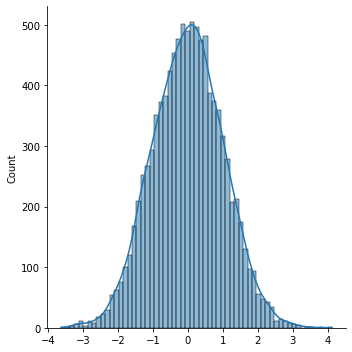

In [63]:
import seaborn as sns 
sns.displot(data, kde = True)

Δίνεται η κατανομή όπως βγήκε σε μένα:

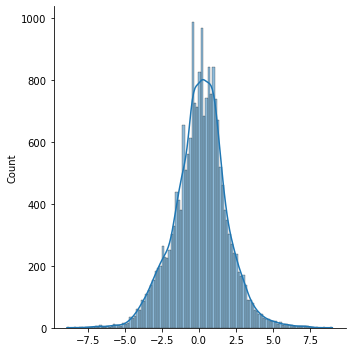

* Σημείωση: με τη βιβλιοθήκη [gzip](https://docs.python.org/3/library/gzip.html) μπορείτε να διαβάσετε απευθείας αρχεία τα οποία είναι συμπιεσμένα σε φορμάτ gunzip. 

# Project 3

Το [Single cell sequencing](https://en.wikipedia.org/wiki/Single_cell_sequencing) είναι μία τεχνική η οποία μας επιτρέπει να εξάγουμε γονιδιωματική πληροφορία από ξεχωριστά κύτταρα τα οποία ανήκουν σε κάποιο ιστό. Αυτό μας δίνει τη δυνατότητα να εξετάσουμε τις διαφορές που έχουν τα κύτταρα σε έναν ετερογενή ιστό, όπως π.χ. ένα κακοήθης όγκος. Μέσω του Single cell sequencing μπορούμε να εξάγουμε τόσο σημειακές μεταλλάξεις όσο και Copy Number Variation (CNVs) μεταξύ των κυττάρων. Σε αυτό το project θα ασχοληθούμε μόνο με CNVs. Σε αυτό το link: https://github.com/NielsenBerkeleyLab/sconce/tree/main/test/diploid υπάρχει μία λίστα από 100 bed αρχεία. Τα αρχεία αυτά περιέχουν τα αποτελέσματα από ένα υποθετικό πείραμα single cell sequencing το οποίο μετράει το πλήθος από CNVs σε διάφορες περιοχές του γονιδιώματας σε 100 διαφορετικά κύτταρα. Για παράδειγμα ας πάρουμε το πρώτο:






In [11]:
download(
    'https://raw.githubusercontent.com/NielsenBerkeleyLab/sconce/main/test/diploid/simu_healthy_cell_0.hg19_lite.bed', 
    'simu_healthy_cell_0.hg19_lite.bed',
)

Ας τυπώσουμε τις πρώτες 10 γραμμές του:

In [13]:
with open('simu_healthy_cell_0.hg19_lite.bed') as f:
    for x in range(10):
        print (f.readline().strip())

chr1	0	250000	328
chr1	250000	500000	355
chr1	500000	750000	357
chr1	750000	1000000	326
chr1	1000000	1250000	342
chr1	1250000	1500000	282
chr1	1500000	1750000	315
chr1	1750000	2000000	233
chr1	2000000	2250000	296
chr1	2250000	2500000	365


Η πρώτη στήλη περιέχει το χρωμόσωμα, η 2η περιέχει την αρχή ενός διαστήματος, η 3η περιέχει το τέλος του διαστήματος και η 4η περιέχει το πλήθος από CNVs που εντοπίστηκαν σε αυτό το διάστημα. Υπάρχουν 100 τέτοια αρχεία και το link του κάθε αρχείου είναι:

```python
N = 45 # ένας αριθμός από το 0 μέχρι και το 99
filename = f'https://raw.githubusercontent.com/NielsenBerkeleyLab/sconce/main/test/diploid/simu_healthy_cell_{N}.hg19_lite.bed'
```

Επίσης σε κάθε αρχείο τα διαστήματα είναι ίδια. 

Σε αυτό το project θα πρέπει να:
* Να κατεβάσετε τοπικά και τα 100 αρχεία
* Να υπολογίσετε τον μέσο όρο των CNVs για κάθε ξεχωριστό διάστημα σε όλα τα αρχεία.
* Να σώσετε το αποτέλεσμα σε ένα αρχείο με το ίδιο format (bed) με το όνομα `average.bed`

Για παράδειγμα ας υποθέσουμε ότι είχαμε μόνο 3 αρχεία με τα εξής δεδομένα:

`1.bed`:
```text
chr1	0	250000	4
chr1	250000	500000	3
chr1	500000	750000	8
chr1	750000	1000000	12
```

`2.bed`:
```text
chr1	0	250000	6
chr1	250000	500000	7
chr1	500000	750000	1
chr1	750000	1000000	9
```

`3.bed`:
```text
chr1	0	250000	7
chr1	250000	500000	4
chr1	500000	750000	2
chr1	750000	1000000	6
```

Τότε το αποτέλεσμα θα πρέπει να είναι:

`average.bed`:
```text
chr1	0	250000	5.666666666666667
chr1	250000	500000	4.666666666666667
chr1	500000	750000	3.6666666666666665
chr1	750000	1000000	9
```

* Σημείωση 1: τα αρχεία προέρχονται από αυτή τη δημοσίευση: https://academic.oup.com/bioinformatics/article/38/7/1801/6515610 
* Σημείωση 2: Μπορείτε να κατεβάσετε και όλα τα αρχεία απευθείας από αυτό το link: https://www.dropbox.com/s/f8pm7me93hr48bn/simu_health.tgz?dl=1. Το αρχείο `simu_health.tgz` περιέχει όλα τα αρχεία συμπιεσμένα. 

# Project 4 (προαιρετικό!)
**Προσοχή!** Τα services [MyGene.info](https://MyGene.info), [MyVariant.info](https://MyVariant.info), [MyChem.info](https://MyChem.info), [MyDisease.info](https://MyDisease.info), άλλαξαν συμπεριφορά από τότε που έγραψα την εκφώνηση για αυτό το project! Δυστυχώς αυτό είναι μία κλασσική τακτική στη περιοχή της βιοπλροφορικής: Η αλλαγή των προδιαγραφών μίας υπηρεσίας με τέτοιο τρόπο ώστε να χαλάει η συμβατότητα με προγράμματα ή άλλες υπηρεσίες που τα χρησιμοποιούν. Μπορείτε αν θέλετε να κάνετε μία "ελεύθερη υλοποίηση" αυτού του project με βάση τη τωρινή συμπεριφορά αυτών των υπηρεσιών. Προειδοποιώ όμως ότι κάποια από τα παραδείγματα που δίνω δεν δουλεύουν και ότι θα πρέπει εσείς να βρείτε ποιες είναι οι σωστές παράμετροι!


4 από τις πιο βασικές διαδικτυακές υπηρεσίες για την αναζήτηση βιολογικής πληροφορίας είναι: 

* MyGene.info 
* MyVariant.info
* MyChem.info
* MyDisease.info

Τα 4 αυτά site παρέχουν τη δυνατότητα σε προγραμματιστές να αναζητήσουν πληροφορίες για γονίδια, μεταλλάξεις, χημικές ενώσεις και ασθένειες. Ας παίξουμε λίγο μαζί τους:



In [1]:
import json
import urllib3

def get_json(url):
    http = urllib3.PoolManager()
    

    response = http.request("GET", url)
    data = json.loads(response.data) 
    return data

Πληροφορίες για τη μετάλλαξη chr7:g.55241707G>T:

In [37]:
info = get_json('http://myvariant.info/v1/variant/chr7:g.55241707G>T')

Ας δούμε τι είδους πληροφορία έχει φέρει για αυτή τη μετάλλαξη:

In [39]:
info.keys()

dict_keys(['_id', '_version', 'cadd', 'cgi', 'chrom', 'clinvar', 'cosmic', 'dbnsfp', 'dbsnp', 'docm', 'hg19', 'mutdb', 'observed', 'snpedia', 'snpeff', 'vcf'])

Φαίνεται ότι έχει φέρει πληροφορία από τη [dbsnp](https://www.ncbi.nlm.nih.gov/snp/). Τι πληροφορία όμως έχει φέρει;

In [47]:
info['dbsnp'].keys()

dict_keys(['_license', 'alt', 'chrom', 'citations', 'dbsnp_build', 'gene', 'hg19', 'ref', 'rsid', 'vartype'])

Έχει φέρει πληροροφία και για το γονίδιο:

In [48]:
info['dbsnp']['gene'].keys()

dict_keys(['geneid', 'is_pseudo', 'name', 'rnas', 'strand', 'symbol'])

Ποιο είναι λοιπόν το όνομα και το σύμβολο του γονιδίου όπου βρίσκεται αυτή η μετάλλαξη;

In [52]:
print (info['dbsnp']['gene']['symbol'])
print (info['dbsnp']['gene']['name'])

EGFR
epidermal growth factor receptor


Ποιος είναι ο κωδικός της μετάλλαξης σύμφωνα με τη dbsnp;

In [54]:
print (info['dbsnp']['rsid'])

rs28929495


Μπορούμε να κάνουμε τώρα το αντίθετο; Να πάρουμε τον κωδικό της μετάλλαξης και να βρούμε τη θέση της;

In [55]:
info = get_json('http://myvariant.info/v1/query/?q=dbsnp.rsid:rs28929495')

In [60]:
info.keys()

dict_keys(['took', 'total', 'max_score', 'hits'])

Πόσα αποτελέσματα βρήκε;

In [61]:
info['total']

3

Ας πάρουμε το πρώτο αποτέλεσμα:

In [63]:
info['hits'][0].keys()

dict_keys(['_id', '_score', 'cadd', 'cgi', 'chrom', 'clinvar', 'cosmic', 'dbnsfp', 'dbsnp', 'docm', 'hg19', 'mutdb', 'observed', 'snpedia', 'snpeff', 'vcf'])

Περιέχει τη θέση της μετάλλαξης στο hg19:

In [65]:
info['hits'][0]['hg19']

{'end': 55241707, 'start': 55241707}

In [67]:
info['hits'][0]['vcf']

{'alt': 'T', 'position': '55241707', 'ref': 'G'}

Για αυτό το project θα πρέπει να φτιάξετε μία συνάρτηση η οποία θα παίρνει μία παράμετρο η οποία θα είναι μία μετάλλαξη (π.χ. `chr7:g.55241707G>T`). Στη συνέχεια η συνάρτηση:

* Μέσω του MyVariant.info θα εντοπίζει το γονίδιο (δηλαδή το symbol) που βρίσκεται η μετάλλαξη (αν επιστρέψει πολλά πάρτε το πρώτο).
* Μέσω του MyGene.info θα παίρνει το γονίδιο (δηλαδή το symbol) και θα εντοπίζει τη πρωτεΐνη του γονιδίου (σε Swiss-Prot UniProt ID) (αν επιστρέψει πολλά πάρτε το πρώτο)
* Μέσω του MyChem.info θα παίρνει τη πρωτεΐνη (σε Swiss-Prot UniProt ID) και θα εντοπίζει τη χημική ένωση που έχει συνδεθεί με αυτή τη πρωτεΐνη. Συγκεκριμμένα θα παίρνει το MESH id από το UMLS.
* Μέσω του MyDisease.info θα παίρνει τη χημική ένωση (MESH id) και θα ψάχνει για ασθένειες που έχουν συνδεθεί με αυτήν. Συγκεκριμμένα θα επιστρέφει το label σύμφωνα με τη βάση δεδομένων [MONDO](https://www.ebi.ac.uk/ols/ontologies/mondo), αν επιστρέφει πολλά πάρτε το πρώτο.


Μπορείτε να διαβάσετε περισσότερα για αυτές τις υπηρεσίες:
* https://docs.mydisease.info/en/latest/ 
* https://docs.myvariant.info/en/latest/
* https://docs.mygene.info/en/latest/
* https://docs.mychem.info/en/latest/

Δίνεται ο παρακάτω βοηθητικός κώδικας:

In [3]:
# Έυρεση του MESH ID των χημικών ενώσεων που συνδέονται με τη πρωτεΐνη με UniProt ID: P34981
info = get_json('https://mychem.info/v1/query?q=drugcentral.bioactivity.uniprot.uniprot_id:P34981&fields=umls.mesh')

In [78]:
info

{'took': 13,
 'total': 3,
 'max_score': 10.96833,
 'hits': [{'_id': 'LQZAIAZUDWIVPM-NDQFZYFBSA-N',
   '_score': 10.96833,
   'umls': {'mesh': 'C065049'}},
  {'_id': 'XNSAINXGIQZQOO-SRVKXCTJSA-N',
   '_score': 10.26664,
   'umls': {'mesh': 'D013973'}},
  {'_id': 'ANTSCNMPPGJYLG-UHFFFAOYSA-N',
   '_score': 9.71619,
   'umls': {'mesh': 'D002707'}}]}

In [91]:
# Εύρεση του Mondo label των ασθενειών οι οποίες έχουν συνδεθεί με τη χημική ουσία με MESH ID:  C065049
info = get_json('http://mydisease.info/v1/query/?ctd.chemical_related_to_disease.mesh_chemical_id=C065049&fields=mondo.label')

In [90]:
info

{'took': 11,
 'total': 127016,
 'max_score': 1.0,
 'hits': [{'_id': 'MONDO:0020747',
   '_score': 1.0,
   'mondo': {'label': 'sitosterolemia 1'}},
  {'_id': 'MONDO:0020748',
   '_score': 1.0,
   'mondo': {'label': 'sitosterolemia 2'}},
  {'_id': 'MONDO:0020749',
   '_score': 1.0,
   'mondo': {'label': 'polycystic lipomembranous osteodysplasia with sclerosing leukoencephalopathy 1'}},
  {'_id': 'MONDO:0020750',
   '_score': 1.0,
   'mondo': {'label': 'polycystic lipomembranous osteodysplasia with sclerosing leukoencephalopathy 2'}},
  {'_id': 'MONDO:0020751',
   '_score': 1.0,
   'mondo': {'label': 'orthostatic hypotension 2'}},
  {'_id': 'MONDO:0020752', '_score': 1.0, 'mondo': {'label': 'EJM1'}},
  {'_id': 'MONDO:0020755', '_score': 1.0},
  {'_id': 'MONDO:0020759',
   '_score': 1.0,
   'mondo': {'label': 'epilepsy, childhood absence, susceptibility to, 1'}},
  {'_id': 'MONDO:0020762',
   '_score': 1.0,
   'mondo': {'label': 'diencephalic-mesencephalic junction dysplasia syndrome 2'}},

In [2]:
# Eύρεση του Swiss-Prot Uniprot Id ενός γονιδίου
info = get_json('http://mygene.info/v3/query?q=BRCA2&fields=uniprot.Swiss-Prot')
info

{'took': 20,
 'total': 3209,
 'max_score': 439.7702,
 'hits': [{'_id': '675',
   '_score': 439.7702,
   'uniprot': {'Swiss-Prot': 'P51587'}},
  {'_id': '12190', '_score': 368.8395, 'uniprot': {'Swiss-Prot': 'P97929'}},
  {'_id': '360254', '_score': 312.095},
  {'_id': '102044477', '_score': 283.72272},
  {'_id': 'ENSGGOG00000015808', '_score': 283.72272},
  {'_id': '101698015', '_score': 283.72272},
  {'_id': 'MGP_SPRETEiJ_G0029058', '_score': 283.72272},
  {'_id': '100601625', '_score': 283.72272},
  {'_id': '721981', '_score': 283.72272},
  {'_id': 'ENSOCUG00000016878', '_score': 283.72272}]}

# Project 5

Σκοπός αυτού του project είναι να φτιάξετε το αριστερό μέρος (5min / 0min) της γραφική παράσταση 3Α, από [αυτή τη δημοσίευση](http://europepmc.org/article/MED/24850871). 

> de Graaf EL, Giansanti P, Altelaar AF, Heck AJ. Single-step enrichment by Ti4+-IMAC and label-free quantitation enables in-depth monitoring of phosphorylation dynamics with high reproducibility and temporal resolution. Molecular & Cellular Proteomics : MCP. 2014 Sep;13(9):2426-2434. DOI: 10.1074/mcp.o113.036608. PMID: 24850871; PMCID: PMC4159659. 

Αυτό είναι ένα [Volcano plot](https://en.wikipedia.org/wiki/Volcano_plot_%28statistics%29). Τα Volcano plots είναι χρήσιμα όταν έχουμε κάνει ένα πείραμα και μετράμε πολλές μεταβλητές (π.χ. γονίδια, πρωτεΐνες, μεταλλάξεις, ...) πάνω σε δύο συνθήκες (π.χ υγιεί / άρρωστα δείγματα). Στον άξονα Χ βάζουμε το "fold change" δηλαδή ο λόγος της μεταβολής της μέτρησης από τη μία συνθήκη στην άλλη. Για παράδειγμα αν ένα γονίδιο έχει τριπλάσια έκφραση σε μία υγιή κατάσταση σε σχέση με μία μη-υγιή, τότε στο Χ θα έχει τιμή 3, ενώ αν έχει το 1/3 της έκφρασης τότε στο Χ θα έχει -3. Στον Υ άξονα βάζουμε το p-value κάποιου στατιστικού μέτρου που ελέγχει κατα πόσο αυτή η αλλαγή της έκφρασης είναι στατιστικά σημαντική. 

Στο συγκεκριμένο πείραμα μελετάται η αλλαγή στη συγκέντρωση μετά από 5/10/20/30/60 λεπτά από την εφαρμογή ενός πρωτοκόλου φωσφορυλίωσης και το συγκεκριμμένο plot περιέχει τις διαφορές που εντοπίστηκαν στα πρώτα 5 λεπτά. 

<!-- https://github.com/saezlab/kinact -->

Μπορείτε να φορτώσετε τα δεδομένα στα pandas με:


In [92]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/saezlab/kinact/master/kinact/data/deGraaf_2014_jurkat.csv')

Ας δούμε τι στήλες έχει:

In [9]:
df.columns

Index(['Unique identifier', 'Proteins', 'Protein names', 'Gene names',
       'Positions within proteins', 'Amino acid', 'Multiplicity',
       'Sequence window', 'Modified sequence', 'PEP', 'Score',
       'Score for localization', 'Score diff', 'Localization prob', 'Charge',
       'm/z', 'Mass error [ppm]', 'Average Log2 Intensity 0min',
       'Average Log2 Intensity 5min', 'Average Log2 Intensity 10min',
       'Average Log2 Intensity 20min', 'Average Log2 Intensity 30min',
       'Average Log2 Intensity 60min', 'p value_5vs0min', 'p value_10vs0min',
       'p value_20vs0min', 'p value_30vs0min', 'p value_60vs0min',
       'p value_10vs5min', 'p value_20vs5min', 'p value_30vs5min',
       'p value_60vs5min', 'p value_20vs10min', 'p value_30vs10min',
       'p value_60vs10min', 'p value_30vs20min', 'p value_60vs20min',
       'p value_60vs30min', 'Cluster'],
      dtype='object')

Σε αυτό το project λοιπόν θα πρέπει να φτιάξετε ένα plot. Στον άξονα  Χ θα βάλετε τις τιμές τη διαφορά των στηλών `Average Log2 Intensity 5min` και `Average Log2 Intensity 0min`. Στον άγονα y θα βάλετε τις τιμές της στήλης `p value_5vs0min`. Το plot θα πρέπει να μοιάζει με το παρακάτω:

<AxesSubplot:xlabel='aa', ylabel='p value_5vs0min'>

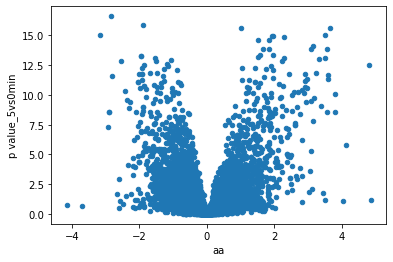

# Project 6

Ένας σημαντικός τομέας έρευνας στη γενετική είναι ο διαχωρισμός των αλληλουχιών μεταξύ "σημαντικών" και "μη-σημαντικών". Ως σημαντικές συνήθως εννοούμε αυτές που υπάρχουν σε γονίδιο, που εκφράζονται, που είναι στόχοι από μεταγραφικούς παράγοντες ή είναι οι ίδιες μεταγραφικοί παράγοντες, κτλ. Σε αυτόν τον τομέα έρχονται να βοηθήσουν τα νευρωνικά δίκτυα τα οποία είναι στην ουσία μαθηματικά μοντέλα τα οποία μπορούν να "εκπαιδευτούν" έτσι ώστε να διαχωρίζουν διαφορετικού τύπου δεδομένα. Σε [αυτό το paper λοιπόν](https://www.frontiersin.org/articles/10.3389/fgene.2019.00432) οι συγγραφείς προσπαθούν να εκπαιδεύσουν ένα νευρωνικό δίκτυο το οποίο να μπορεί να προβλέψει αν μία ακολουθία θα στοχευθεί από μεταγραφικούς παράγοντες ή όχι. Το πρώτο πρόβλημα που πρέπει να λύσουν είναι το πως θα δώσουν στο νευρωνικό δίκτυο τη πληροφορία "ακολουθία". Το νευρωνικό καταλαβαίνει μόνο αριθμούς. Για παράδειγμα αν η ακολουθία είναι η `GCGATTTGAGGTA`, θα πρέπει να του τη "δώσουν" με μορφή αριθμών. Αν μετατρέψουμε τη κάθε βάση σε αριθμό, π.χ. `A=1, C=2, G=3, T=4`, τότε αυτό θα μπερδέψει το νευρωνικό αφού θα εννοηθεί ότι το C (2) είναι πιο κοντά στο G (3) από ότι π.χ. είναι το Α (1) στο Τ (4). Μία λύση είναι η μετατροπή [one hot](https://en.wikipedia.org/wiki/One-hot). Σε αυτή τη μετατροπή κάθε γράμμα αντί να μετατραπεί σε 1 αριθμό μετατρέπεται σε μία λίστα με τόσα στοιχεία όσα είναι τα διαφορετικά γράμματα (στη περίπτωσή μας 4). Για ένα γράμμα, η λίστα έχει όλες τις τιμές 0 εκτός από τη μοναδική θέση του γράμματος η οποία είναι 1. Για παράδειγμα μπορούμε να ορίσουμε ότι η μετατροπή μας θα είναι:

```
A --> [1,0,0,0]
C --> [0,1,0,0]
G --> [0,0,1,0]
T --> [0,0,0,1]
```

Δείτε και τη [1η εικόνα της δημοσίευσης](https://www.frontiersin.org/files/Articles/454779/fgene-10-00432-HTML-r1/image_m/fgene-10-00432-g001.jpg) που δείχνει πως έχει μετατραπεί η ακολουθία `ATGTAAAAGTTCCCT`. 

Σε αυτό το project θα πρέπει μα φτιάξετε μία συνάρτηση η οποία θα παίρνει ένα string (το οποία δεν θα είναι απαραίτητα ακολουθία DNA) και θα επιστρέφει μία λίστα με την one-hot μετατροπή της. Η λίστα αυτή θα έχει τόσες υπολίστες όσες είναι και το μήκος του string της παραμέτρου. Κάθε υπολίστα θα έχει τόσα στοιχεία όσα είναι και τα διαφορετικά γράμματα του string της παραμέτρου. Κάθε υπολίστα θα έχει όλες τις τιμές 0 εκτός από μία η οποία θα είναι 1 και θα βρίσκεται στη θέση που αντιστοιχεί στο κάθε γράμματος του string της παραμέτρου. Αυτή η θέση θα είναι η αντίστοιχη θέση του γράμματος στη ταξινόμηση των γραμμάτων στο string της παραμέτρου. Για παράδειγμα θα πρέπει:

```python
f('ACCGTA') 
#Επιστρέφει:
[
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1],
    [1,0,0,0],
]

f('ACA')
#Επιστρέφει:
[
    [1,0],
    [0,1],
    [1,0],
]

f('kanterakis') 
# Το "kanterakis" αποτελείται από 10 γράμματα
# το "kanterakis" αποτελείται απο τα εξής διαφορετικά γράμματα --> {'n', 't', 'r', 'a', 'k', 's', 'e', 'i'}
# Αν τα ταξινομήσουμε θα έχουμε τη λίστα --> ['a', 'e', 'i', 'k', 'n', 'r', 's', 't']
# Παρατηρούμε ότι αποτελείται από 8 διαφορετικά γράμματα.
# Σύμφωνα με αυτή τη ταξινόμηση οι αντιστοιχίες του κάθε γράμματος του string "kanterakis" είναι:
# To k είναι το 4ο γράμμα
# Το a είναι το 1ο γράμμα
# To n είναι το 5ο γράμμα
# Το t είναι το 8ο γράμμα
# Το e είναι το 2ο γράμμα 
# To r είναι το 6ο γράμμα
# Tο a είναι το 1ο γράμμα
# Το k είναι το 4ο γράμμα 
# Το i είναι το 3ο γράμμα
# Το s είναι το 7ο γράμμα.
# Συνεπώς θα πρέπει να φτιάξω μία λίστα από 10 υπολίστες (όσες το μέγεθος του string)
# Η κάθε υπολίστα θα περιέχει 8 αριθμούς (όσα τα διαφορετικά γράμματα)
# Κάθε υπολίστα θα έχει όλους τους αριθμούς 0 εκτός από έναν ο οποίος θα έχει τη τιμή 1.
# Η θέση του 1 θα είναι αυτή που υποδείχτηκε παραπάνω.
# Άρα: το f('kanterakis') επιστρέφει:

[[0, 0, 0, 1, 0, 0, 0, 0], # Το 1 βρίσκεται στη 4η θέση
 [1, 0, 0, 0, 0, 0, 0, 0], # Το 1 βρίσκεται στη 1η θέση
 [0, 0, 0, 0, 1, 0, 0, 0], # Το 1 βρίσκεται στη 5η θέση
 [0, 0, 0, 0, 0, 0, 0, 1], # Το 1 βρίσκεται στη 8η θέση
 [0, 1, 0, 0, 0, 0, 0, 0], # Το 1 βρίσκεται στη 2η θέση
 [0, 0, 0, 0, 0, 1, 0, 0], # Το 1 βρίσκεται στη 6η θέση
 [1, 0, 0, 0, 0, 0, 0, 0], # Το 1 βρίσκεται στη 1η θέση
 [0, 0, 0, 1, 0, 0, 0, 0], # Το 1 βρίσκεται στη 4η θέση
 [0, 0, 1, 0, 0, 0, 0, 0], # Το 1 βρίσκεται στη 3η θέση
 [0, 0, 0, 0, 0, 0, 1, 0], # Το 1 βρίσκεται στη 7η θέση
]


```



# Project 7

Ας υποθέσουμε ότι έχουμε ένα σύνολο από ακολουθίες τις οποίες τις έχουμε στοιχίσει (align) μεταξύ τους. Επίσης υποθέτουμε ότι επιτρέπουμε να έχουμε σημειακές μεταλλάξης, insertions και deletions. Ένα παράδειγμα είναι το παρακάτω:

<!-- https://academic.oup.com/bioinformatics/article/37/Supplement_1/i460/6319683?searchresult=1#284153558 A variant selection framework for genome graphs  . Figure 1 -->

In [205]:
l = [
    'TGACAT---TA',
    'TAACATGTCTA',
    'TC---T---TA',
]

Εδώ έχουμε ένα παράδειγμα από 3 ακολουθίες τις οποίες έχουμε στοιχίσει. Παρατηρούμε ότι:
* Στη 2η θέση υπάρχει μία σημειακή μετάλλαξη (G/A/C)
* Η 3η ακολουθία περιέχει ένα deletion τριών νουκλεοτιδίων (ACA) στη 3η θέση.
* Η 2η ακολουθία περιέχει ένα insertion τριών νουκλεοτιδίων (GTC) στη 7η θέση.

Σε αυτό το project θα προσπαθήσουμε να αναπαραστήσουμε αυτές τις ακολουθίες σαν έναν γράφο. Υπάρχει αρκετή δουλειά πάνω σε αυτή τη κατεύθυνση, ένα παράδειγμα είναι οι γράφοι [De Bruijn](https://en.wikipedia.org/wiki/De_Bruijn_graph).

Ένας γράφος αποτελείται από κόμβους και ακμές. Μία ακμή ενώνει 2 κόμβους. Στη python μπορείτε να εγκαταστήσετε τη βιβλιοθήκη [networkx](https://networkx.org/documentation/stable/index.html) για τη δημιουργία, χειρισμό και αναπαράσταση γράφων:

In [ ]:
!pip install networkx

Στη networkx μπορούμε να φτιάξουμε έναν κατευθυνόμενο γράφο και να τον αναπαραστίσουμε ως εξής:

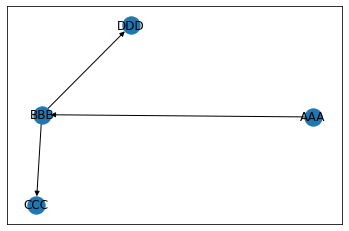

In [206]:
import networkx as nx

G = nx.DiGraph()


G.add_edge('AAA', 'BBB',) # Ακμή: AAA --> BBB
G.add_edge('BBB', 'CCC') # Ακμή: BBB --> CCC
G.add_edge('BBB', 'DDD') # Ακμή: BBB --> DDD


pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)


Μπορούμε επίσης να βάλουμε τους κόμβους σε κυκλικές θέσεις (circular layout):

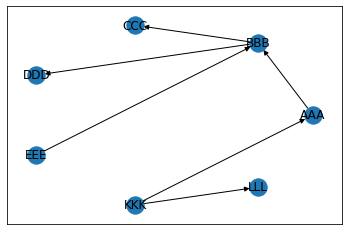

In [213]:
import networkx as nx

G = nx.DiGraph()


G.add_edge('AAA', 'BBB',) # Ακμή: AAA --> BBB
G.add_edge('BBB', 'CCC') # Ακμή: BBB --> CCC
G.add_edge('BBB', 'DDD') # Ακμή: BBB --> DDD
G.add_edge('EEE', 'BBB') # Ακμή: EEE --> BBB
G.add_edge('KKK', 'LLL') # Ακμή: KKK --> LLL
G.add_edge('KKK', 'AAA') # Ακμή: KKK --> AAA


pos = nx.circular_layout(G)
nx.draw_networkx(G,pos)

Μπορούμε επίσης να αλλάξουμε και τις ταμπέλες (labels) στους κόμβους:

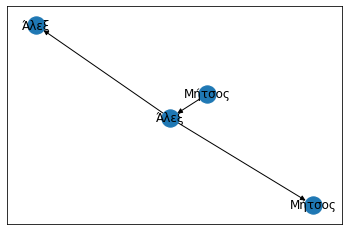

In [217]:

G = nx.DiGraph()


G.add_edge('AAA', 'BBB',) # Ακμή: AAA --> BBB
G.add_edge('BBB', 'CCC') # Ακμή: BBB --> CCC
G.add_edge('BBB', 'DDD') # Ακμή: BBB --> DDD

labels = {
    'AAA': 'Μήτσος',
    'BBB': 'Άλεξ',
    'CCC': 'Μήτσος',
    'DDD': 'Άλεξ', 
}

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos, labels=labels, with_labels = True)

Ή να βάλουμε και ταμπέλες στις ακμές:

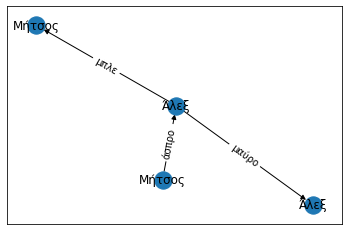

In [224]:
G = nx.DiGraph()


G.add_edge('AAA', 'BBB',) # Ακμή: AAA --> BBB
G.add_edge('BBB', 'CCC') # Ακμή: BBB --> CCC
G.add_edge('BBB', 'DDD') # Ακμή: BBB --> DDD

labels = {
    'AAA': 'Μήτσος',
    'BBB': 'Άλεξ',
    'CCC': 'Μήτσος',
    'DDD': 'Άλεξ', 
}

edge_labels = {
        ('AAA', 'BBB'): 'άσπρο',
        ('BBB', 'DDD'): 'μαύρο',
        ('BBB', 'CCC'): 'μπλε',
    }

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos, labels=labels, with_labels = True)
_ = nx.draw_networkx_edge_labels(G,pos, edge_labels = edge_labels)



Επιστρέφουμε στην εκφώνηση! Θέλουμε να αναπαραστήσουμε τις επόμενες στοιχισμένες ακολουθίες σαν ένα γράφο (έχω προσθέσει ένα σχόλιο για να φαίνεται η θέση κάθε βάσης:

```
l = [
    'TGACAT---TA',
    'TAACATGTCTA',
    'TC---T---TA',
#    12345678901
]
```

Η ιδέα είναι ότι κάθε κόμβος θα αναπαραστάει εναν συνδυασμό θέσης/βάσης o οποίος θα μπορούσε να συμβεί. Με βάση τη λίστα `l`, έχουμε τους εξής κόμβους στον γράφο:
* Κόμβος 1  --> Θέση:1  βάση:Τ 
* Κόμβος 2  --> Θέση:2  βάση:G
* Κόμβος 3  --> Θέση:2  βάση:A
* Κόμβος 4  --> Θέση:2  βάση:C
* Κόμβος 5  --> Θέση:3  βάση:A
* Κόμβος 6  --> Θέση:4  βάση:C
* Κόμβος 7  --> Θέση:5  βάση:A
* Κόμβος 8  --> Θέση:6  βάση:T
* Κόμβος 9  --> Θέση:7  βάση:G
* Κόμβος 10 --> Θέση:8  βάση:T
* Κόμβος 11 --> Θέση:9  βάση:C
* Κόμβος 12 --> Θέση:10 βάση:Τ
* Κόμβος 13 --> Θέση:11 βάση:A

Τώρα που έχουμε τους κόμβους, πρέπει να υπολογίσουμε τις ακμές. 

Με βάση τη 1η ακολουθία  `TGACAT---TA` οι δυνατές ακμές είναι:
* Κόμβος 1 --> Κόμβος 2
* Κόμβος 2 --> Κόμβος 5
* Κόμβος 5 --> Κόμβος 6
* Κόμβος 6 --> Κόμβος 7
* Κόμβος 7 --> Κόμβος 8
* Κόμβος 8 --> Κόμβος 12
* Κόμβος 12 --> Κόμβος 13

Με βάση τη 2η ακολουθία  `TAACATGTCTA` οι δυνατές ακμές είναι:
* Κόμβος 1 --> Κόμβος 3 
* Κόμβος 3 --> Κόμβος 5 
* Κόμβος 5 --> Κόμβος 6
* Κόμβος 6 --> Κόμβος 7
* Κόμβος 7 --> Κόμβος 8
* Κόμβος 8 --> Κόμβος 9
* Κόμβος 9 --> Κόμβος 10
* Κόμβος 10 --> Κόμβος 11 
* Κόμβος 11 --> Κόμβος 12
* Κόμβος 12 --> Κόμβος 13

Με βάση τη 3η ακολουθία  `TC---T---TA` οι δυνατές ακμές είναι:
* Κόμβος 1 --> Κόμβος 4
* Κόμβος 4 --> Κόμβος 8
* Κόμβος 8 --> Κόμβος 12
* Κόμβος 12 --> Κόμβος 13


Αν βάλουμε τώρα όλες τις ακμές μαζί, και για τις 3 ακολουθίες, όπου κάθε ακμή μπορεί να υπάρχει μόνο μία φορά (set!) θα έχουμε:
* Κόμβος 1 --> Κόμβος 2
* Κόμβος 1 --> Κόμβος 3 
* Κόμβος 1 --> Κόμβος 4
* Κόμβος 2 --> Κόμβος 5
* Κόμβος 3 --> Κόμβος 5 
* Κόμβος 4 --> Κόμβος 8
* Κόμβος 5 --> Κόμβος 6
* Κόμβος 6 --> Κόμβος 7
* Κόμβος 7 --> Κόμβος 8
* Κόμβος 8 --> Κόμβος 9
* Κόμβος 8 --> Κόμβος 12
* Κόμβος 9 --> Κόμβος 10
* Κόμβος 10 --> Κόμβος 11
* Κόμβος 11 --> Κόμβος 12
* Κόμβος 12 --> Κόμβος 13

Οπότε ο τελικός μας γράφος είναι:

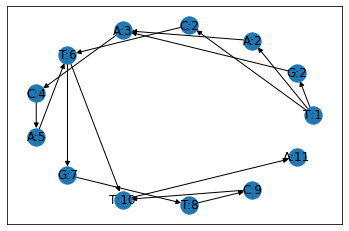

In [231]:
import re

G = nx.DiGraph()

node_labels_str = '''
    Κόμβος 1 --> Θέση:1 βάση:Τ
    Κόμβος 2 --> Θέση:2 βάση:G
    Κόμβος 3 --> Θέση:2 βάση:A
    Κόμβος 4 --> Θέση:2 βάση:C
    Κόμβος 5 --> Θέση:3 βάση:A
    Κόμβος 6 --> Θέση:4 βάση:C
    Κόμβος 7 --> Θέση:5 βάση:A
    Κόμβος 8 --> Θέση:6 βάση:T
    Κόμβος 9 --> Θέση:7 βάση:G
    Κόμβος 10 --> Θέση:8 βάση:T
    Κόμβος 11 --> Θέση:9 βάση:C
    Κόμβος 12 --> Θέση:10 βάση:Τ
    Κόμβος 13 --> Θέση:11 βάση:A
'''

node_labels = re.findall(r'Κόμβος (\d+) --> Θέση:(\d+) βάση:(\w)', node_labels_str)
node_labels = {x[0]: f'{x[2]}:{x[1]}' for x in node_labels}

a = '''
    Κόμβος 1 --> Κόμβος 2
    Κόμβος 1 --> Κόμβος 3
    Κόμβος 1 --> Κόμβος 4
    Κόμβος 2 --> Κόμβος 5
    Κόμβος 3 --> Κόμβος 5
    Κόμβος 4 --> Κόμβος 8
    Κόμβος 5 --> Κόμβος 6
    Κόμβος 6 --> Κόμβος 7
    Κόμβος 7 --> Κόμβος 8
    Κόμβος 8 --> Κόμβος 9
    Κόμβος 8 --> Κόμβος 12
    Κόμβος 9 --> Κόμβος 10
    Κόμβος 10 --> Κόμβος 11
    Κόμβος 11 --> Κόμβος 12
    Κόμβος 12 --> Κόμβος 13

'''

edges = re.findall(r'Κόμβος (\d+) --> Κόμβος (\d+)', a)

for x in edges:
    G.add_edge(x[0], x[1])

    
pos = nx.circular_layout(G)
nx.draw_networkx(G,pos, labels=node_labels, with_labels = True)

Το ζητούμενο λοιπόν σε αυτό το project είναι να φτιάξετε μία συνάρτηση η οποία θα παίρνει σαν παράμετρο μία λίστα από στοιχισμένες ακολουθίες (όπως η λίστα `l`) και θα εμφανίζει έναν γράφο όπως ο παραπάνω.

Σημείωση: Παρόλο που η εκφώνηση ήταν 2 σελίδες, η υλοποίηση είναι 10 γραμμές!

# Project 8

Είναι όλες οι ακολουθίες του DNA ίδιες ή κάποιες εμφανίζονται περισσότερες φορές στο γονιδίωμα ενός οργανισμούς; Σε αυτό το project θα μελετήσουμε ακριβώς αυτό. Καταρχήν πρέπει να ορίσουμε τα [k-mer](https://en.wikipedia.org/wiki/K-mer). To k-mer μίας ακολουθίας είναι το σύνολο από όλες τις υπο-ακολουθίες μεγέθους k μιας ακολουθίας. Για παράδειγμα το 4-mer της ακολουθίας `ACGGGT` είναι το σύνολο:

```python
{'ACGG', 'CGGG', 'GGGT'} 
```

Σε αυτό το project αυτό που πρέπει να κάνετε είναι:
* Να πάρετε με όποιο τρόπο θέλετε (π.χ. σε αρχείο) το γονιδίωμα του E. coli που υπάρχει σε αυτό το link: [Escherichia coli str. K-12 substr. MG1655, complete genome](https://www.ncbi.nlm.nih.gov/nuccore/U00096.2)
* Να βρείτε πόσες φορές εμφανίζεται το κάθε 8-mer αυτού του γονιδιώματος. Hint: Counter
* Στη συνέχεια θα πρέπει να μετρήσετε:
   * Πόσα μέλη του 8-mer εμφανίζονται μόνο μία φορά;
   * Πόσα μέλη του 8-mer εμφανίζονται 2 φορές;
   * Πόσα μέλη του 8-mer εμφανίζονται 3 φορές;
   * Πόσα μέλη του 8-mer εμφανίζονται 4 φορές;
   * ...
   * Πόσα μέλη του 8-mer εμφανίζονται Μ φορές, όπου Μ το ποιο κοινό μέλος του συνόλου του 8-mer;
* Φτιάξτε ένα plot όπου στον Χ άξονα θα είναι όλοι οι αριθμοί από το 1 μέχρι το Μ, στον Υ άξονα θα είναι το πόσα μέλη του 8-mer εμφανίζονται τόσες φορές όσες το Χ.

Το plot που θα φτιάξετε θα πρέπει να είναι ίδιο με [αυτό που εμφανίζεται στη σελίδα της wikipedia](https://en.wikipedia.org/wiki/K-mer#/media/File:E._coli_8-mer_spectrum.svg). 

Με τη δική μου υλοποίηση το plot που βγήκε είναι:

 

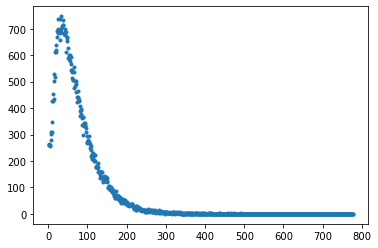

# Project 9

Σε αυτό το projet θα ασχοληθούμε με το [δέντρο της ζωής](https://en.wikipedia.org/wiki/Tree_of_life_(biology))! Για αρχή θα πρέπει να κατεβάσετε και να αποσυμπιέσετε αυτό το αρχείο: https://ftp.ncbi.nih.gov/pub/taxonomy/taxdump.tar.gz  

Αφού το αποσυμπιέσετε θα δείτε ότι μεταξύ άλλων υπάρχει το αρχείο `nodes.dmp`. Το αρχείο αυτό περιέχει όλο το δέντρο της ζωής. Αυτό που μας ενδιαφέρει είναι οι πρώτες δύο στήλες του αρχείου. Η πρώτη στήλη μας δίνει τον κωδικό του κόμβου. Η 2η στήλη μας δίνει τον κωδικό του "πατέρα" αυτού του κόμβου. Για παράδειγμα ο κωδικός του Homo sapiens σε αυτό το δέντρο είναι 9606. Μέσα στο αρχείο μπορούμε να δούμε ότι ο πατέρας του 9606 είναι το 9605. Ο πατέρας του 9605 είναι το 207598. Ο πατέρας του 207598 είναι το 9604. Αν συνεχίσουμε αυτή τη διαδικασία θα καταλήξουμε στο 1 που είναι και η ρίζα του δέντρου:

9606 --> 9605 --> 207598 --> 9604 --> 314295 --> 9526 --> 314293 --> 376913 --> 9443 --> 314146 --> 1437010 --> 9347 --> 32525 --> 40674 --> 32524 --> 32523 --> 1338369 --> 8287 --> 117571 --> 117570 --> 7776 --> 7742 --> 89593 --> 7711 --> 33511 --> 33213 --> 6072 --> 33208 --> 33154 --> 2759 --> 131567 --> 1

Όλοι οι ενδιάμεσοι κόμβοι μεταξύ του 9606 και του 1 είναι οι κωδικοί του γένους, οικογένεια, τάξη, βασίλειο, κτλ.

Ένα άλλο αρχείο που υπάρχει αν αποσυμπιέσετε το `taxdump.tar.gz` είναι το `names.dmp`. Το αρχείο αυτό περιέχει στη πρώτη στήλη το όνομα του κάθε οργανισμού (με βάση τη [διωνυμική ονοματολογία](https://el.wikipedia.org/wiki/%CE%94%CE%B9%CF%89%CE%BD%CF%85%CE%BC%CE%B9%CE%BA%CE%AE_%CE%BF%CE%BD%CE%BF%CE%BC%CE%B1%CF%84%CE%BF%CE%BB%CE%BF%CE%B3%CE%AF%CE%B1)) και στη 2η στήλη τον κωδικό του οργανισμού στο δέντρο της ζωής (δηλαδή τον αντίστοιχο αριθμό που μπορείτε να το αναζητήσετε στο αρχείο `nodes.dmp`). 

Με βάση τα παραπάνω φτιάξτε μία συνάρτηση η οποία θα παίρνει σαν παράμετρο ένα string. Η συνάρτηση θα επιστρέφει μία λίστα με όλους τους κωδικούς των κόμβων του δέντρου της ζωής που πρέπει να διανύσουμε για να πάμε από τον οργανισμό με το όνομα της παραμέτρου μέχρι τον κόμβο με κωδικό 1. Δίνονται μερικά παραδείγματα:

In [322]:
f('Homo sapiens')

[9606,
 9605,
 207598,
 9604,
 314295,
 9526,
 314293,
 376913,
 9443,
 314146,
 1437010,
 9347,
 32525,
 40674,
 32524,
 32523,
 1338369,
 8287,
 117571,
 117570,
 7776,
 7742,
 89593,
 7711,
 33511,
 33213,
 6072,
 33208,
 33154,
 2759,
 131567,
 1]

In [323]:
f('Felis catus') # η γάτα

[9685,
 9682,
 338152,
 9681,
 379583,
 33554,
 314145,
 1437010,
 9347,
 32525,
 40674,
 32524,
 32523,
 1338369,
 8287,
 117571,
 117570,
 7776,
 7742,
 89593,
 7711,
 33511,
 33213,
 6072,
 33208,
 33154,
 2759,
 131567,
 1]

Τώρα που έχουμε φτιάξει την f μπορούμε να μετράμε αποστάσεις μεταξύ οργανισμών! Ορίζουμε την απόσταση μεταξύ οργανισμών ως τη μικρότερη διαδρομή που πρέπει να κάνουμε στο δέντρο της ζωής για να πάμε από τον έναν οργανισμό στον άλλο. Αυτό είναι εξαιρετικά εύκολο να το υπολογίσουμε. Για παράδειγμα ας υποθέσουμε ότι θέλουμε να βρούμε την απόσταση μεταξύ του ανθρώπου και της γάτας. Ξεκινάμε από τον κωδικό του ανθρώπου (9606) και βλέπουμε ότι δεν υπάρχει στη λίστα της γάτας. Ανεβαίνουμε ένα βήμα πάνω στο δέντρο και πάμε στον κωδικό 9605 και βλέπουμε ότι και πάλι δεν υπάρχει. Συνεχίζουμε να ανεβαίνουμε και βλέπουμε ότι η 11η εγγραφή στη λίστα του ανθρώπου (1437010) είναι ο πρώτος αριθμός που υπάρχει στη λίστα και του ανθρώπου αλλά και της γάτας. Άρα η απόσταση για να πάμε από τον άνθρωπο μέχρι τον κοινό κόμβο μεταξύ ανθρώπου και γάτας είναι 11. Από εκεί και πέρα συνεχίζουμε μέχρι να φτάσουμε στη γάτα. Παρατηρούμε ότι το 1437010 είναι η 8η εγγραφή στη λίστα της γάτας. Συνεπώς η απόσταση ανθρώπου και γάτας είναι 11+8 = 19. 

Φτιάξτε λοιπόν τη συνάρτηση distance η οποία θα παίρνει ορίσματα 2 strings a,b. Η συνάρτηση θα επιστρέφει την απόσταση μεταξύ των οργανισμών a και b. Όπως περιγράφηκε παραπάνω.

Δίνονται μερικά επιπλέον παραδείγματα:

In [341]:
distance('Homo sapiens', 'Felis catus') # άνθρωπος <--> γάτα

19

In [342]:
distance('Homo sapiens', 'Canis familiaris') # άνθρωπος <--> σκύλος

19

In [343]:
distance('Felis catus', 'Canis familiaris') # γάτα <--> σκύλος

12

In [344]:
distance('Homo sapiens', 'Pan troglodytes') # άνθρωπος <--> χιμπαντζής

6

In [345]:
distance('Panthera leo', 'Felis catus') # λιοντάρι <--> γάτα

8

In [346]:
distance('Homo sapiens', 'banana') # άνθρωπος <--> μπανάνα

47

# Project 10

Σε αυτό το link: http://ftp.ensembl.org/pub/release-105/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.22.fa.gz μπορείτε να κατεβάσετε όλο το χρωμόσωμα 22. 

Δίνεται επίσης η παρακάτω συνάρτηση η οποία διαβάζει όλο το χρωμόσωμα σε ένα string το οποίο περιέχει μόνο χαρακτήρες A,C,G,T :


In [35]:
import gzip

# Αλλάξτε τη τοποθεσία του αρχείου !
def download_22():
    s = ''
    with gzip.open('/Users/admin/Downloads/Homo_sapiens.GRCh38.dna.chromosome.22.fa.gz', 'rt') as f:
        for i, l in enumerate(f):

            if i==0:
                continue

            if i%50_000 == 0:
                print (f'{i}')

            s += l.strip().replace('N','')
            
    return s

To string που επιστρέφει αυτή η συνάρτηση έχει μέγεθος 39.159.777 χαρακτήρες. Παρόλο που είναι αρκετά μεγάλο, ο υπολογιστής σας δεν θα έχει πρόβλημα να το φορτώσει όλο στη μνήμη. Σκοπός σε αυτό το project είναι να απαντήσετε στη παρακάτω ερώτηση:

**Ποιο είναι το μέγεθος της μικρότερης ακολουθίας DNA που ΔΕΝ υπάρχει στο χρωμόσωμα 22;**